# **Encoding**

El siguiente paso es hacer el encoding a las variables categóricas.

In [1]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import pickle


import sys
import warnings
warnings.filterwarnings('ignore')

sys.path.append('../../../')
from src import funciones_encoding as fe

pd.set_option('display.max_columns', None) # para poder visualizar todas las columnas de los DataFrames


In [2]:
df = pd.read_pickle("../../../datos/cluster_1/df_nonulls.pkl")
df.head(2)

,Ship Mode,Segment,Country,Market,Category,Sub-Category,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,Same Day,Consumer,United States,US,Technology,Accessories,7,0.0,762.1845,933.57,Critical
1,Second Class,Corporate,Australia,APAC,Furniture,Chairs,9,0.1,-288.7650,923.63,Critical


Primero comprobamos visualmente si las variables tienen orden:

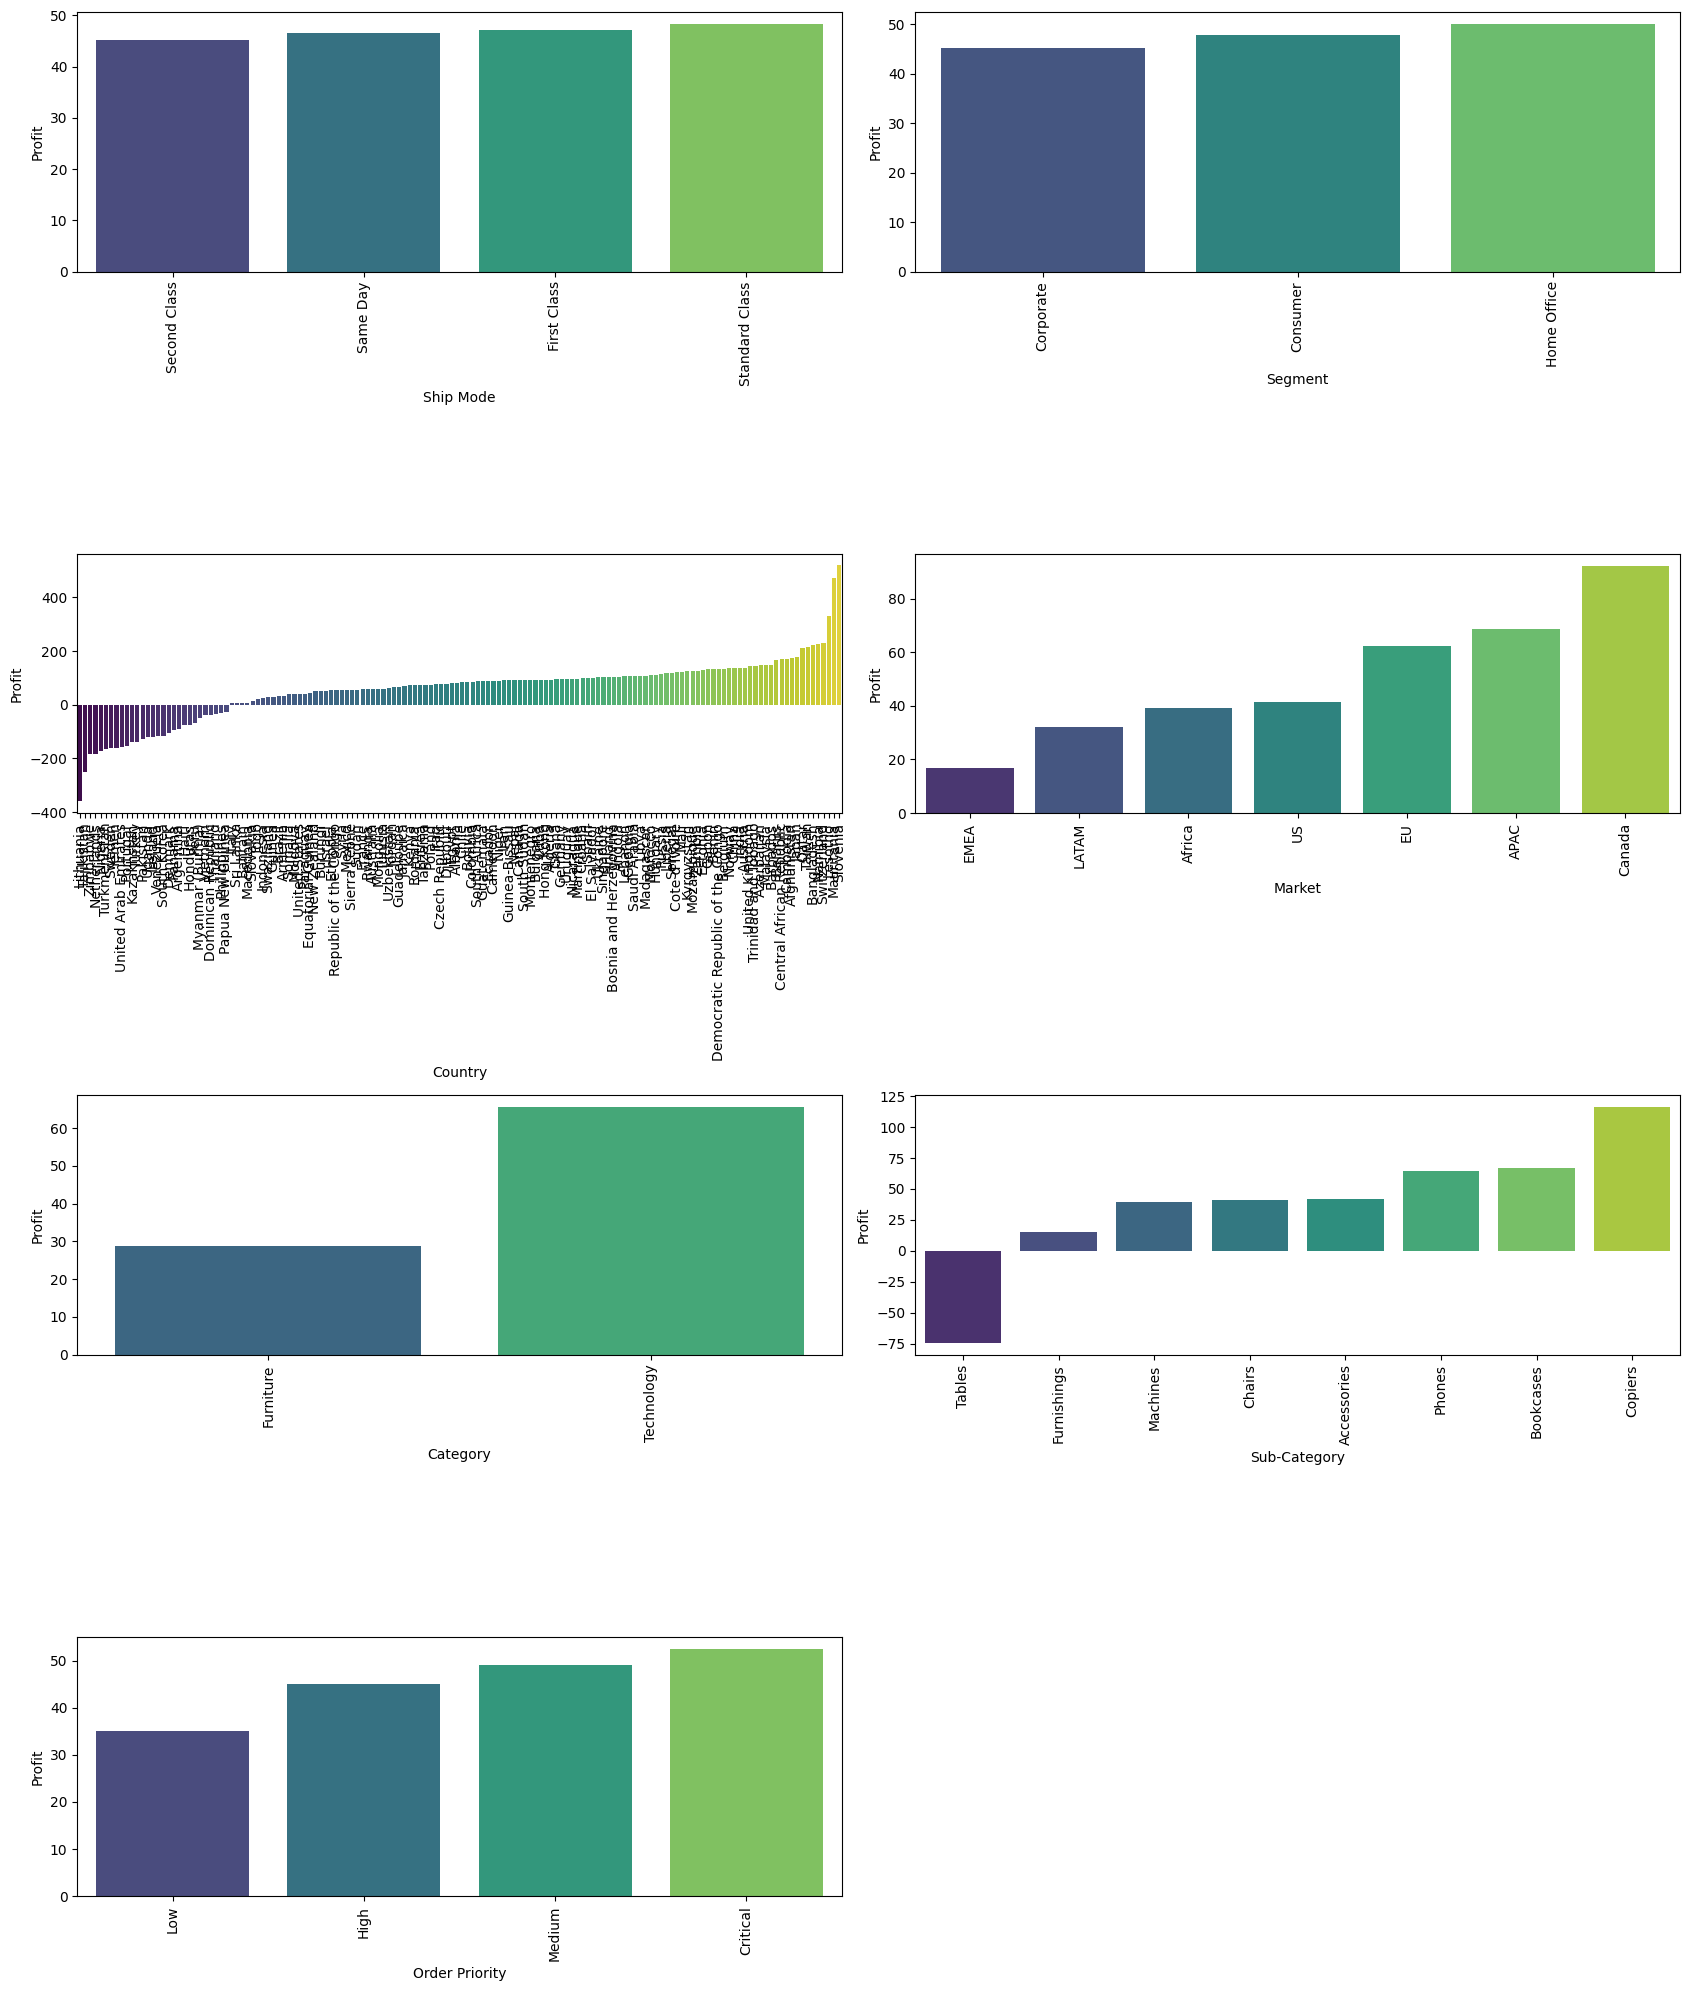

In [4]:
lista_col_categoricas = df.select_dtypes(exclude=np.number).columns
var_respuesta = "Profit"

analisis = fe.Analisis_Visual_Encoding(df, lista_col_categoricas, var_respuesta)
analisis.crear_barplot(tamano_grafica=(17, 20))

A primera vista parece que Ship mode y Segment no tienen orden, comprobémoslo:

In [5]:
var_respuesta = "Profit"
asuncion = fe.Asunciones(df, var_respuesta)

for col in lista_col_categoricas:
    print(f"Estamos analizando la variable {col.upper()}")
    asuncion.identificar_normalidad(metodo = "kolmogorov") 
    asuncion.identificar_homogeneidad(columna_categorica = col)
    test = fe.TestEstadisticos(df, var_respuesta, col)
    test.run_all_tests()
    print("\n###########################\n")

Estamos analizando la variable SHIP MODE
Para la columna Profit, los datos NO siguen una distribución normal según el test de Kolmogorov-Smirnov.
En la variable Ship Mode las varianzas son homogéneas entre grupos.
Generando grupos...
Grupos generados: ['Same Day', 'Second Class', 'First Class', 'Standard Class']

Realizando test de Kruskal...
Estadístico de prueba: 0.24439177002786794
Valor p: 0.9701234534215378
>>>>>>>>> NO hay evidencia suficiente para concluir que hay una diferencia significativa.

Los resultados del test de Tukey son: 



,meandiff,p-adj,lower,upper,group_diff



###########################

Estamos analizando la variable SEGMENT
Para la columna Profit, los datos NO siguen una distribución normal según el test de Kolmogorov-Smirnov.
En la variable Segment las varianzas son homogéneas entre grupos.
Generando grupos...
Grupos generados: ['Consumer', 'Corporate', 'Home Office']

Realizando test de Kruskal...
Estadístico de prueba: 2.6594765545747743
Valor p: 0.26454649006505077
>>>>>>>>> NO hay evidencia suficiente para concluir que hay una diferencia significativa.

Los resultados del test de Tukey son: 



,meandiff,p-adj,lower,upper,group_diff



###########################

Estamos analizando la variable COUNTRY
Para la columna Profit, los datos NO siguen una distribución normal según el test de Kolmogorov-Smirnov.
En la variable Country las varianzas NO son homogéneas entre grupos.
Generando grupos...
Grupos generados: ['United States', 'Australia', 'Germany', 'Senegal', 'New Zealand', 'Afghanistan', 'Saudi Arabia', 'Brazil', 'Poland', 'China', 'Mexico', 'El Salvador', 'Taiwan', 'India', 'Dominican Republic', 'France', 'Democratic Republic of the Congo', 'United Kingdom', 'Indonesia', 'Uruguay', 'Iran', 'Mozambique', 'Bangladesh', 'Spain', 'Ukraine', 'Morocco', 'Canada', 'Philippines', 'Austria', 'Colombia', 'Netherlands', 'Malaysia', 'Ecuador', 'Thailand', 'Italy', 'Somalia', 'Guatemala', 'Belarus', 'Cambodia', 'Japan', 'Russia', 'Egypt', 'Azerbaijan', 'Lithuania', 'Argentina', 'Lesotho', 'Nicaragua', 'Vietnam', 'Cuba', 'Romania', 'Turkey', 'South Africa', 'Singapore', 'Angola', 'Pakistan', 'Finland', 'Cameroon', 'Zambia', 

,meandiff,p-adj,lower,upper,group_diff
3,-264.9672,0.0007,-484.9327,-45.0017,Afghanistan-Argentina
52,-247.0703,0.0021,-460.6508,-33.4898,Afghanistan-Honduras
59,-294.0362,0.0096,-564.5867,-23.4857,Afghanistan-Ireland
65,-312.6430,0.0031,-586.7525,-38.5334,Afghanistan-Kazakhstan
72,-533.1878,0.0000,-841.2603,-225.1152,Afghanistan-Lithuania
...,...,...,...,...,...
10553,-183.5221,0.0000,-285.7474,-81.2968,United Kingdom-Vietnam
10556,-329.2658,0.0002,-589.7547,-68.7769,United Kingdom-Zimbabwe
10559,-156.8393,0.0002,-281.5348,-32.1439,United States-Venezuela
10577,242.9236,0.0010,38.8483,446.9989,Venezuela-Zambia



###########################

Estamos analizando la variable MARKET
Para la columna Profit, los datos NO siguen una distribución normal según el test de Kolmogorov-Smirnov.
En la variable Market las varianzas NO son homogéneas entre grupos.
Generando grupos...
Grupos generados: ['US', 'APAC', 'EU', 'Africa', 'EMEA', 'LATAM', 'Canada']

Realizando test de Kruskal...
Estadístico de prueba: 257.5841102069998
Valor p: 9.813256655226494e-53
>>>>>>>>> HAY DIFERENCIAS SIGNIFICATIVAS ENTRE LOS DATOS

Los resultados del test de Tukey son: 



,meandiff,p-adj,lower,upper,group_diff
0,-29.3309,0.0006,-50.1403,-8.5215,APAC-Africa
2,-51.7352,0.0000,-71.6608,-31.8095,APAC-EMEA
4,-36.4140,0.0000,-51.2143,-21.6138,APAC-LATAM
5,-27.1883,0.0000,-42.4329,-11.9437,APAC-US
8,23.3166,0.0273,1.4876,45.1456,Africa-EU
11,-75.3881,0.0284,-146.2491,-4.5270,Canada-EMEA
15,45.7209,0.0000,24.7326,66.7091,EMEA-EU
17,24.5469,0.0075,4.0607,45.0330,EMEA-US
18,-30.3997,0.0000,-46.6022,-14.1972,EU-LATAM
19,-21.1740,0.0032,-37.7834,-4.5646,EU-US



###########################

Estamos analizando la variable CATEGORY
Para la columna Profit, los datos NO siguen una distribución normal según el test de Kolmogorov-Smirnov.
En la variable Category las varianzas NO son homogéneas entre grupos.
Generando grupos...
Grupos generados: ['Technology', 'Furniture']

Realizando test de Mannwhitneyu...
Estadístico del Test de Mann-Whitney U: 56339333.5
Valor p: 5.38731800824293e-53
>>>>>>>>> HAY DIFERENCIAS SIGNIFICATIVAS ENTRE LOS DATOS

Los resultados del test de Tukey son: 



,meandiff,p-adj,lower,upper,group_diff
0,36.5764,0.0,29.894,43.2588,Furniture-Technology



###########################

Estamos analizando la variable SUB-CATEGORY
Para la columna Profit, los datos NO siguen una distribución normal según el test de Kolmogorov-Smirnov.
En la variable Sub-Category las varianzas NO son homogéneas entre grupos.
Generando grupos...
Grupos generados: ['Accessories', 'Chairs', 'Phones', 'Copiers', 'Tables', 'Machines', 'Bookcases', 'Furnishings']

Realizando test de Kruskal...
Estadístico de prueba: 830.0897754677238
Valor p: 5.950788148863109e-175
>>>>>>>>> HAY DIFERENCIAS SIGNIFICATIVAS ENTRE LOS DATOS

Los resultados del test de Tukey son: 



,meandiff,p-adj,lower,upper,group_diff
0,25.0058,0.0030,5.3095,44.7021,Accessories-Bookcases
2,74.1598,0.0000,54.0021,94.3175,Accessories-Copiers
3,-27.3387,0.0002,-45.6657,-9.0117,Accessories-Furnishings
5,22.4019,0.0043,4.3279,40.4758,Accessories-Phones
6,-116.5839,0.0000,-144.5017,-88.6661,Accessories-Tables
7,-26.2765,0.0009,-45.5150,-7.0380,Bookcases-Chairs
8,49.1540,0.0000,27.8634,70.4446,Bookcases-Copiers
9,-52.3445,0.0000,-71.9106,-32.7783,Bookcases-Furnishings
10,-27.5457,0.0111,-51.4257,-3.6657,Bookcases-Machines
12,-141.5897,0.0000,-170.3361,-112.8433,Bookcases-Tables



###########################

Estamos analizando la variable ORDER PRIORITY
Para la columna Profit, los datos NO siguen una distribución normal según el test de Kolmogorov-Smirnov.
En la variable Order Priority las varianzas son homogéneas entre grupos.
Generando grupos...
Grupos generados: ['Critical', 'Medium', 'High', 'Low']

Realizando test de Kruskal...
Estadístico de prueba: 6.889097880379902
Valor p: 0.07551787404710301
>>>>>>>>> NO hay evidencia suficiente para concluir que hay una diferencia significativa.

Los resultados del test de Tukey son: 



,meandiff,p-adj,lower,upper,group_diff



###########################



Hemos confirmado nuestras sospechas y además hemos visto que ship mode tampoco tiene orden, por lo que a las variables que no tienen orden les haremos un one-hot y al resto un target.

In [7]:
diccionario_encoding={"onehot":['Ship Mode', 'Segment', 'Order Priority'], "target":['Country', 'Market', 'Category', 'Sub-Category']}
var_respuesta = "Profit"
encoding = fe.Encoding(df, diccionario_encoding, var_respuesta)

In [8]:
df_ohe, one_hot_encoder = encoding.one_hot_encoding()
df_ohe.drop(columns=diccionario_encoding["onehot"], inplace=True)
df_ohe.head()

,Country,Market,Category,Sub-Category,Quantity,Discount,Profit,Shipping Cost,Ship Mode_First Class,Ship Mode_Same Day,Ship Mode_Second Class,Ship Mode_Standard Class,Segment_Consumer,Segment_Corporate,Segment_Home Office,Order Priority_Critical,Order Priority_High,Order Priority_Low,Order Priority_Medium
0,United States,US,Technology,Accessories,7,0.0,762.1845,933.57,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,Australia,APAC,Furniture,Chairs,9,0.1,-288.7650,923.63,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,Australia,APAC,Technology,Phones,9,0.1,919.9710,915.49,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,Germany,EU,Technology,Phones,5,0.1,-96.5400,910.16,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,Senegal,Africa,Technology,Copiers,8,0.0,311.5200,903.04,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [9]:
df_ohe_target, target_encoder = encoding.target_encoding()
df_ohe_target.head(3)

,Profit,Country,Market,Category,Sub-Category,Quantity,Discount,Shipping Cost,Ship Mode_First Class,Ship Mode_Same Day,Ship Mode_Second Class,Ship Mode_Standard Class,Segment_Consumer,Segment_Corporate,Segment_Home Office,Order Priority_Critical,Order Priority_High,Order Priority_Low,Order Priority_Medium
0,762.1845,41.307011,41.307011,65.454958,42.154896,7,0.0,933.57,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
1,-288.7650,58.931116,68.495338,28.878567,40.884178,9,0.1,923.63,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
2,919.9710,58.931116,68.495338,65.454958,64.556749,9,0.1,915.49,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


Guardamos los encoders para las futuras predicciones:

In [11]:
with open('../../../datos/cluster_1/preprocesamiento/target_encoder.pkl', 'wb') as f:
    pickle.dump(target_encoder, f)

with open('../../../datos/cluster_1/preprocesamiento/one_hot_encoder.pkl', 'wb') as f:
    pickle.dump(one_hot_encoder, f)


Guardamos el df la con el encoding hecho:

In [12]:
df_ohe_target.to_pickle("../../../datos/cluster_1/df_nonulls_encoded.pkl")